In [1]:
import pandas as pd
import string
import numpy as np
from datetime import date
from matplotlib import pyplot as plt

In [2]:
lenders = pd.read_csv("lenders.csv")
loans_lenders = pd.read_csv('loans_lenders.csv')
loans = pd.read_csv("loans.csv")

In [58]:
loans_lenders['LENDERS'] = loans_lenders['LENDERS'].str.split(', ')
loans_lenders_list = loans_lenders.explode('LENDERS')
lenders['MEMBER_SINCE'] = pd.to_datetime(lenders['MEMBER_SINCE'], unit='s')
lenders['PURCHASE_PER_MONTH'] = lenders['LOAN_PURCHASE_NUM']/((pd.to_datetime('2021-02-20 00:00:00') - lenders['MEMBER_SINCE'])/np.timedelta64(1, 'M'))

(array([1.500556e+06, 3.000800e+04, 8.711000e+03, 3.998000e+03,
        2.092000e+03, 1.351000e+03, 8.790000e+02, 5.840000e+02,
        4.860000e+02, 3.420000e+02, 2.850000e+02, 2.110000e+02,
        1.810000e+02, 1.450000e+02, 1.020000e+02, 1.090000e+02,
        9.400000e+01, 7.600000e+01, 6.700000e+01]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <BarContainer object of 19 artists>)

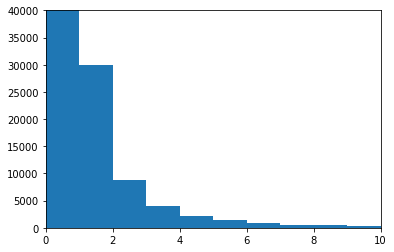

In [122]:
plt.ylim(0,40000)
plt.xlim(0,10)
plt.hist(lenders['PURCHASE_PER_MONTH'],bins = [i for i in range(20)])

In [3]:
loans_lenders['LENDERS'] = loans_lenders['LENDERS'].str.split(', ')
#loans_lenders_list = loans_lenders.merge(l_tags, left_on = 'LOAN_ID', right_on='LOAN_ID', how = 'left')
#loans_lenders_list = loans_lenders_list.explode('LENDERS')
#loans_lenders_list = loans_lenders_list.drop('loan_id', axis = 1)

In [44]:
loans_lenders_list

,LOAN_ID,LENDERS,TAGS
0,572013,NaN,"[user_favorite, user_favorite]"
1,509279,NaN,NaN
2,90715,NaN,NaN
3,377330,NaN,NaN
4,504951,NaN,"[volunteer_pick, volunteer_like]"
...,...,...,...
1998472,1996513,NaN,"[Parent, Woman-Owned Business]"
1998473,2011573,NaN,"[Woman-Owned Business, Repeat Borrower, Eco-fr..."
1998474,2011764,NaN,NaN
1998475,2012621,NaN,NaN


In [4]:
lenders_dict=loans_lenders_list.groupby('LENDERS').aggregate(lambda x: tuple(x))

NameError: name 'loans_lenders_list' is not defined

In [36]:
lenders_merge  = lenders.merge(lenders_dict, left_on ='PERMANENT_NAME', right_on ='LENDERS', how = 'left')

In [5]:
loans_lenders

,LOAN_ID,LENDERS
0,572013,"[aaron6136, suzette9319, sophia8549, jessica76..."
1,509279,"[nick5848, elize3658, alex6186, jensfredrik919..."
2,90715,"[maggie7526, harish3790, stephen3381, lynette5..."
3,377330,"[paddy3814, matthewpeters, jaclyn8905, ramius6..."
4,504951,"[shawn8447, shawn8447, evancarmichael, yaro506..."
...,...,...
1998472,1996513,"[mallory5472, shiekhah, thehollypeck, imad3393]"
1998473,2011573,"[bob4739, william35124246, manon3668, michaeli..."
1998474,2011764,"[ann86371901, rotaryclub4823, keyvan9314, zoha..."
1998475,2012621,"[opajan9527, lendiogives, hans3822, gooddogg1,..."


In [ ]:
df3 = pd.DataFrame(loans_lenders['LOAN_ID'].apply(lambda x: loans['TAGS'] if x in loans['LOAN_ID'] else None))

In [ ]:
loans[loans['LOAN_ID'] == 1998476 ]